# Comparison between "Comprehensive upper-air observation network from 1905 to present" and "Insitu IGRA radiosoundings baseline network"

**Contains modified Copernicus Climate Change Service Information 2020**
under [License](https://apps.ecmwf.int/datasets/licences/copernicus/)

*Copernicus Climate Change Service (C3S) - Upper Air Data Service (2020)*

The purpose of this IPython Notebook is to find differences in both mentioned data sets and to compare them. 

    Author: U. Voggenberger
    Date: 02.2021
    Contact: ulrich.voggenberger [at] univie.ac.at
    License: C3S, 2021


In [1]:
import pandas
import numpy as np
import sys, zipfile, os, time
import matplotlib.pyplot as plt
import glob
import datetime
import urllib3
import cdsapi
import xarray
import shutil
import warnings
import pickle
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 10),
         'axes.labelsize': 20,
         'axes.titlesize': 24,
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

In [3]:
def request(rqdict, source):
    t0 = time.time()

    c = cdsapi.Client()
    r = c.retrieve(
        source,rqdict)
    if True:
        r.download(target='download.zip')
        assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
    z = zipfile.ZipFile('download.zip')
    z.extractall(path='./test/')
    z.close()
    print('Request took: ' + str(time.time() - t0) + ' seconds')
    
    files = glob.glob('./test/*.nc')
    
    if files[0].split('/')[-1].startswith('IGRA'):
        ds = xarray.open_dataset(files[0])            
        data = ds.to_dataframe()
        for i in files[1:]:
            ds = xarray.open_dataset(i)            
            data = data.append(ds.to_dataframe())

    else:
        ds = xarray.open_dataset(files[0]) 
        to_be_removed = ['obs', 'string14', 'trajectory', 'trajectory_index', 'trajectory_label']
        ds = ds.drop_vars(to_be_removed)
        data = ds.to_dataframe()
        for i in files[1:]:
            ds = xarray.open_dataset(i)  
            ds = ds.drop_vars(to_be_removed)
            data = data.append(ds.to_dataframe())
            
    os.remove('download.zip')
    try:
       shutil.rmtree('./test/')
    except:
       print('Error while deleting directory')
    
    return data

---

# Comparing available stations for IGRA (and its harmonized version) and Comprehensive upper-air observation network (CUON)

---

In [4]:
cuon = 'insitu-comprehensive-upper-air-observation-network'
igra = 'insitu-observations-igra-baseline-network'

## Requesting the global data and checking for the number of different stations


In [6]:
dates = ['1980-01-01/1980-01-02','1990-01-01/1990-01-02','2000-01-01/2000-01-02','2010-01-01/2010-01-02','2020-01-01/2020-01-02']   
for i in dates:
    print('date range: ' + i)
    da_c = request({
        'variable': 'temperature',
        'period': i,
    }, cuon)
    print('requestable stations from CUON: ' + str(len(da_c.drop_duplicates(['lat', 'lon']))))

    da_i = request({
        'source': 'IGRA',
        'variable': ['air_temperature'],
        'period': i,
    }, igra)
    print('requestable stations from IGRA: ' + str(len(da_i.drop_duplicates(['latitude', 'longitude']))))
    da_ih = request({
        'source': 'IGRA_H',
        'variable': ['air_temperature'],
        'period': i,
    }, igra)
    print('requestable stations from IGRA_H: ' + str(len(da_ih.drop_duplicates(['latitude', 'longitude']))))
    print('\n')

2021-02-04 08:43:22,289 INFO Welcome to the CDS
2021-02-04 08:43:22,291 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-02-04 08:43:22,385 INFO Request is completed
2021-02-04 08:43:22,387 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1612424504.7721968-22335-10-220d530b-a35d-4e0e-8f67-7deb2708bbe1.zip to download.zip (20.8M)
  0%|          | 0.00/20.8M [00:00<?, ?B/s]

date range: 1980-01-01/1980-01-02


2021-02-04 08:43:25,004 INFO Download rate 7.9M/s   


Request took: 3.3201181888580322 seconds


2021-02-04 08:43:33,554 INFO Welcome to the CDS
2021-02-04 08:43:33,556 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-observations-igra-baseline-network
2021-02-04 08:43:33,604 INFO Request is completed
2021-02-04 08:43:33,605 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.insitu_reference.retrieve_test-1612424518.8266735-22335-11-653fb070-9b40-4360-b445-a7df48b1a80f.zip to download.zip (190.5K)
  0%|          | 0.00/190k [00:00<?, ?B/s]

requestable stations from CUON: 962


2021-02-04 08:43:33,728 INFO Download rate 1.5M/s
2021-02-04 08:43:33,849 INFO Welcome to the CDS
2021-02-04 08:43:33,850 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-observations-igra-baseline-network
2021-02-04 08:43:33,898 INFO Request is completed
2021-02-04 08:43:33,899 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.insitu_reference.retrieve_test-1612424520.0104418-22535-10-8c64d189-90ef-42de-8c2e-7d4f01953e4a.zip to download.zip (148K)
2021-02-04 08:43:33,941 INFO Download rate 3.5M/s


Request took: 0.2253279685974121 seconds
requestable stations from IGRA: 645


2021-02-04 08:43:34,052 INFO Welcome to the CDS
2021-02-04 08:43:34,053 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-02-04 08:43:34,142 INFO Request is completed
2021-02-04 08:43:34,143 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1612424548.0474715-22535-11-87d3994b-36c3-474b-b273-9cf00336786e.zip to download.zip (20.6M)


Request took: 0.13906455039978027 seconds
requestable stations from IGRA_H: 337


date range: 1990-01-01/1990-01-02


2021-02-04 08:43:36,267 INFO Download rate 9.7M/s   


Request took: 2.7839295864105225 seconds


2021-02-04 08:43:44,600 INFO Welcome to the CDS
2021-02-04 08:43:44,602 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-observations-igra-baseline-network
2021-02-04 08:43:44,700 INFO Request is completed
2021-02-04 08:43:44,701 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.insitu_reference.retrieve_test-1612424563.538579-19946-8-b93a9c47-5c0a-481f-bebb-cc8d7806e647.zip to download.zip (184.5K)
  0%|          | 0.00/184k [00:00<?, ?B/s]

requestable stations from CUON: 976


2021-02-04 08:43:44,823 INFO Download rate 1.5M/s
2021-02-04 08:43:44,937 INFO Welcome to the CDS
2021-02-04 08:43:44,938 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-observations-igra-baseline-network
2021-02-04 08:43:44,984 INFO Request is completed
2021-02-04 08:43:44,985 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.insitu_reference.retrieve_test-1612424564.9697664-23730-9-a2a74456-8013-4785-a01d-a904f53515a7.zip to download.zip (138.7K)
2021-02-04 08:43:45,030 INFO Download rate 3.1M/s


Request took: 0.27295613288879395 seconds
requestable stations from IGRA: 521
Request took: 0.1367950439453125 seconds


2021-02-04 08:43:45,140 INFO Welcome to the CDS
2021-02-04 08:43:45,141 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-02-04 08:43:45,208 INFO Request is completed
2021-02-04 08:43:45,209 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1612424586.2975416-19946-9-c87f9a7f-f0b8-4b10-91ab-e00d3e7572ff.zip to download.zip (16.7M)
  0%|          | 0.00/16.7M [00:00<?, ?B/s]

requestable stations from IGRA_H: 263


date range: 2000-01-01/2000-01-02


2021-02-04 08:43:46,771 INFO Download rate 10.7M/s  


Request took: 2.1379308700561523 seconds


2021-02-04 08:43:53,574 INFO Welcome to the CDS
2021-02-04 08:43:53,576 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-observations-igra-baseline-network
2021-02-04 08:43:53,641 INFO Request is completed
2021-02-04 08:43:53,642 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.insitu_reference.retrieve_test-1612424595.8211884-12603-7-61785603-8053-49c8-9a30-ea0c7d27c9bc.zip to download.zip (322.1K)
  0%|          | 0.00/322k [00:00<?, ?B/s]

requestable stations from CUON: 750


2021-02-04 08:43:53,795 INFO Download rate 2.1M/s 
2021-02-04 08:43:53,925 INFO Welcome to the CDS
2021-02-04 08:43:53,927 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-observations-igra-baseline-network
2021-02-04 08:43:53,977 INFO Request is queued


Request took: 0.27689528465270996 seconds
requestable stations from IGRA: 549


2021-02-04 08:43:55,016 INFO Request is completed
2021-02-04 08:43:55,017 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.insitu_reference.retrieve_test-1612424634.6697245-16667-17-11b41c8b-816c-4a9e-a10a-f17f5f425a31.zip to download.zip (274.8K)
2021-02-04 08:43:55,170 INFO Download rate 1.8M/s 
2021-02-04 08:43:55,294 INFO Welcome to the CDS
2021-02-04 08:43:55,295 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-02-04 08:43:55,367 INFO Request is queued


Request took: 1.2955834865570068 seconds
requestable stations from IGRA_H: 391


date range: 2010-01-01/2010-01-02


2021-02-04 08:43:56,406 INFO Request is running
2021-02-04 08:44:16,395 INFO Request is completed
2021-02-04 08:44:16,396 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1612424651.5071838-23730-10-f5f0c799-01a8-4893-9371-5b92e94bee36.zip to download.zip (18.1M)
2021-02-04 08:44:18,377 INFO Download rate 9.1M/s   


Request took: 23.62785768508911 seconds


2021-02-04 08:44:25,572 INFO Welcome to the CDS
2021-02-04 08:44:25,574 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-observations-igra-baseline-network
2021-02-04 08:44:25,640 INFO Request is queued


requestable stations from CUON: 782


2021-02-04 08:44:26,679 INFO Request is running
2021-02-04 08:44:28,220 INFO Request is completed
2021-02-04 08:44:28,222 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.insitu_reference.retrieve_test-1612424666.6320307-23344-7-8af83c90-92ec-4d09-886d-55c4065deda1.zip to download.zip (430.5K)
2021-02-04 08:44:28,398 INFO Download rate 2.4M/s 
2021-02-04 08:44:28,541 INFO Welcome to the CDS
2021-02-04 08:44:28,543 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-observations-igra-baseline-network
2021-02-04 08:44:28,589 INFO Request is queued


Request took: 2.887369155883789 seconds
requestable stations from IGRA: 632


2021-02-04 08:44:29,628 INFO Request is completed
2021-02-04 08:44:29,629 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.insitu_reference.retrieve_test-1612424669.348693-23755-7-adb5db16-a540-479a-86db-8b30b2805062.zip to download.zip (338.4K)
2021-02-04 08:44:29,783 INFO Download rate 2.2M/s 
2021-02-04 08:44:29,914 INFO Welcome to the CDS
2021-02-04 08:44:29,915 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-02-04 08:44:29,986 INFO Request is queued


Request took: 1.2951509952545166 seconds
requestable stations from IGRA_H: 462


date range: 2020-01-01/2020-01-02


2021-02-04 08:44:31,025 INFO Request is running
2021-02-04 08:44:51,111 INFO Request is completed
2021-02-04 08:44:51,112 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1612424683.428119-23344-8-25147b79-0ba2-4572-a737-19108d1626d4.zip to download.zip (52.8M)
2021-02-04 08:44:57,493 INFO Download rate 8.3M/s   


Request took: 28.35252857208252 seconds


2021-02-04 08:45:17,787 INFO Welcome to the CDS
2021-02-04 08:45:17,789 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-observations-igra-baseline-network
2021-02-04 08:45:17,895 INFO Request is queued


requestable stations from CUON: 923


2021-02-04 08:45:18,935 INFO Request is running
2021-02-04 08:45:20,474 INFO Request is completed
2021-02-04 08:45:20,476 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.insitu_reference.retrieve_test-1612424719.0984583-20281-13-9b9b668b-d0ce-47d9-9157-c3e5603ac9d9.zip to download.zip (533.8K)
2021-02-04 08:45:20,713 INFO Download rate 2.2M/s 
2021-02-04 08:45:20,865 INFO Welcome to the CDS
2021-02-04 08:45:20,866 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-observations-igra-baseline-network
2021-02-04 08:45:20,916 INFO Request is queued


Request took: 2.986342668533325 seconds
requestable stations from IGRA: 632


2021-02-04 08:45:21,956 INFO Request is running
2021-02-04 08:45:23,496 INFO Request is completed
2021-02-04 08:45:23,497 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.insitu_reference.retrieve_test-1612424721.8966753-21914-10-15efb195-aa25-409c-9815-73ce54a260ca.zip to download.zip (397.4K)
2021-02-04 08:45:23,653 INFO Download rate 2.5M/s 


Request took: 2.8415019512176514 seconds
requestable stations from IGRA_H: 454




## Requesting the global data and checking for the number of available messurements per station


In [72]:
# decades = ['1980-01-01/1989-12-31','1990-01-01/1999-12-31','2000-01-01/2009-12-31','2010-01-01/2019-12-31']   
# decnames = ['1980s','1990s','2000s','2010s'] 

In [73]:
# for i in range(len(decades)):
#     da_ih = request({
#             'source': 'IGRA_H',
#             'variable': ['air_temperature'],
#             'period': decades[i],
#         }, igra)
#     with open('IGRAH_'+decnames[i]+'.p', 'wb') as handle:
#         pickle.dump(da_ih, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [74]:
# with open('IGRAH_01_2000s.p', 'rb') as handle:
#     b = pickle.load(handle)
# with open('IGRAH_02_2000s.p', 'rb') as handle:
#     a = pickle.load(handle)
# b=b.append(a)

# # with open('IGRAH_1980s.p', 'rb') as handle:
# #     b = pickle.load(handle)
    
# b=b.append(a)

In [75]:
# b = b[b.air_pressure == 50000]
# b

In [76]:
# b = b.dropna(axis=0, how='any')
# b

In [77]:
# out = pandas.DataFrame(columns=['lat', 'lon', 'obs'])
# for i in b.drop_duplicates('station_name')['station_name']:
#     check = b[b.station_name == i]
#     out = out.append({'lat': check.iloc[0].latitude, 'lon': check.iloc[0].longitude, 'obs': len(check)}, ignore_index=True)
# with open('/raid60/scratch/uli/igrah_500hpa_2000s.p', 'wb') as handle:
#     pickle.dump(out, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
out = out.append({'lat': da.iloc[0].lat, 'lon': da.iloc[0].lon, 'obs': len(da)}, ignore_index=True)

In [15]:
sys.path.insert(0,os.getcwd()+'/../resort/rasotools-master/')
import rasotools

In [63]:
i = glob.glob('/raid60/scratch/uli/ig*500*.p')
print(i)
c = glob.glob('/raid60/scratch/uli/c*500*.p')
print(c)

['/raid60/scratch/uli/igrah_500hpa_1980s.p', '/raid60/scratch/uli/igrah_500hpa_1990s.p', '/raid60/scratch/uli/igrah_500hpa_2010s.p', '/raid60/scratch/uli/igrah_500hpa_2000s.p']
['/raid60/scratch/uli/cuon_500hpa_1980s.p', '/raid60/scratch/uli/cuon_500hpa_1990s.p', '/raid60/scratch/uli/cuon_500hpa_2000s.p', '/raid60/scratch/uli/cuon_500hpa_2010s.p']


/raid60/scratch/uli/igrah_500hpa_1980s.p


<GeoAxesSubplot:title={'center':' (# 468 / 468)'}>

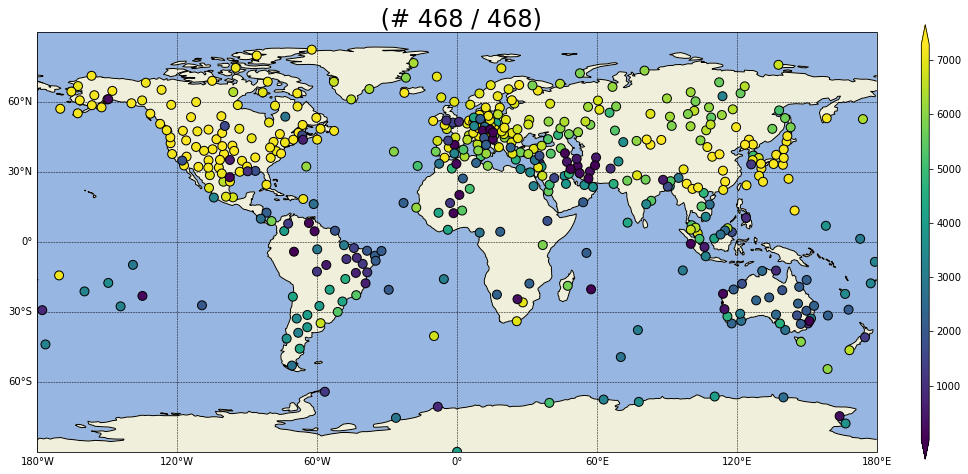

In [64]:
with open(i[0], 'rb') as handle:
    b = pickle.load(handle)
    print(i[0])
rasotools.plot.map.points(lon=b.lon, lat=b.lat, values=b.obs)


/raid60/scratch/uli/cuon_500hpa_1980s.p


<GeoAxesSubplot:title={'center':' (# 5130 / 5130)'}>

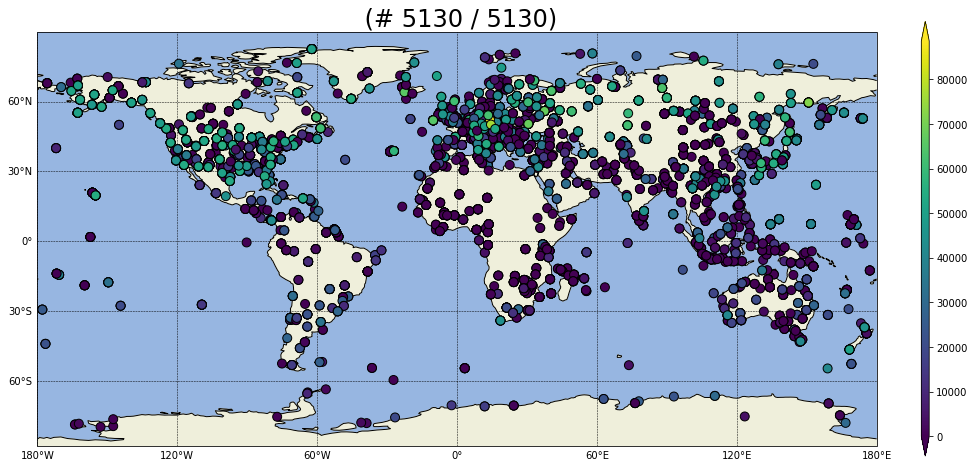

In [65]:
with open(c[0], 'rb') as handle:
    b = pickle.load(handle)
    print(c[0])
rasotools.plot.map.points(lon=b.lon, lat=b.lat, values=b.obs)

/raid60/scratch/uli/igrah_500hpa_1990s.p


<GeoAxesSubplot:title={'center':' (# 527 / 527)'}>

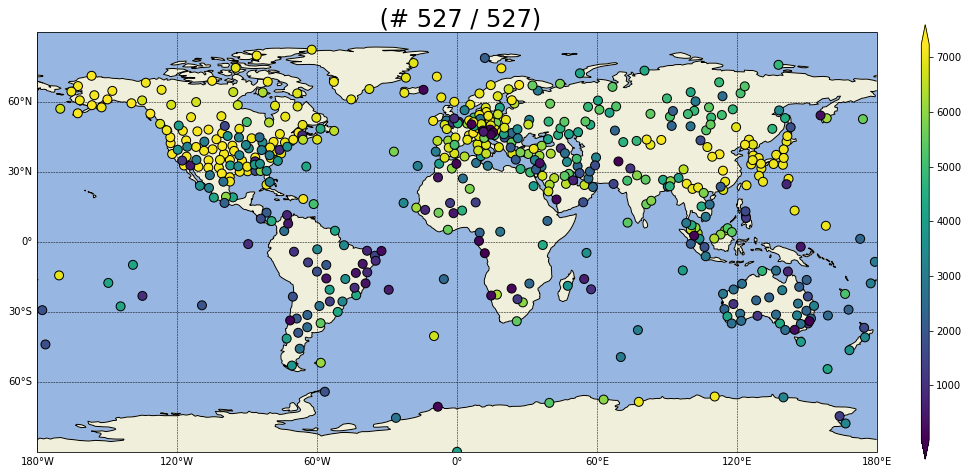

In [66]:
with open(i[1], 'rb') as handle:
    b = pickle.load(handle)
    print(i[1])
rasotools.plot.map.points(lon=b.lon, lat=b.lat, values=b.obs)

/raid60/scratch/uli/cuon_500hpa_1990s.p


<GeoAxesSubplot:title={'center':' (# 83 / 83)'}>

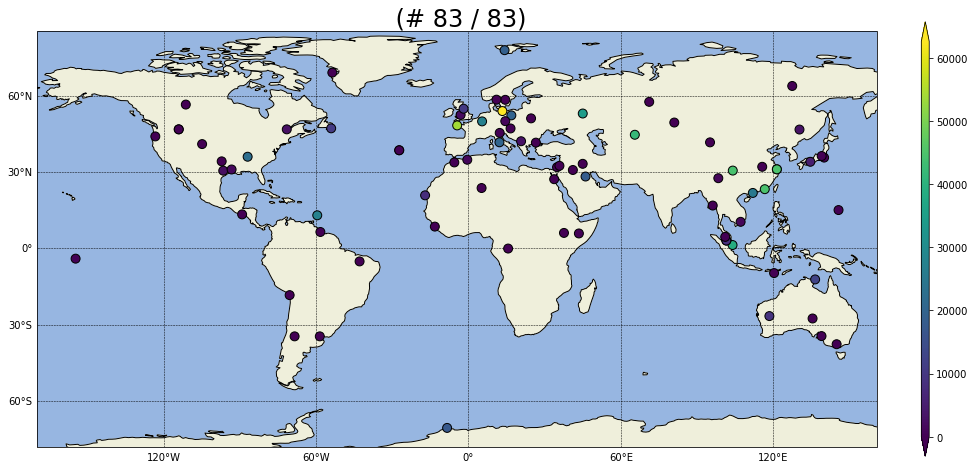

In [67]:
with open(c[1], 'rb') as handle:
    b = pickle.load(handle)[5130:]
    print(c[1])
rasotools.plot.map.points(lon=b.lon, lat=b.lat, values=b.obs)

/raid60/scratch/uli/igrah_500hpa_2000s.p


<GeoAxesSubplot:title={'center':' (# 596 / 596)'}>

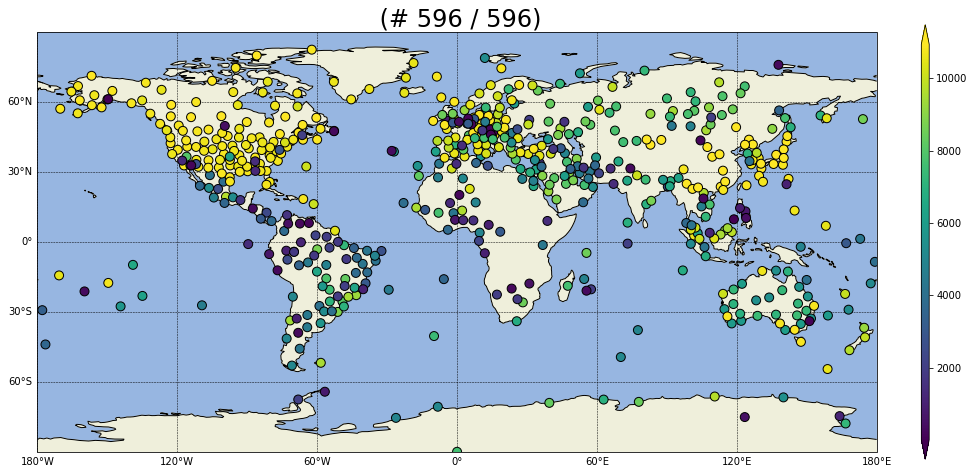

In [68]:
with open(i[3], 'rb') as handle:
    b = pickle.load(handle)
    print(i[3])
rasotools.plot.map.points(lon=b.lon, lat=b.lat, values=b.obs)

/raid60/scratch/uli/cuon_500hpa_2000s.p


<GeoAxesSubplot:title={'center':' (# 5130 / 5130)'}>

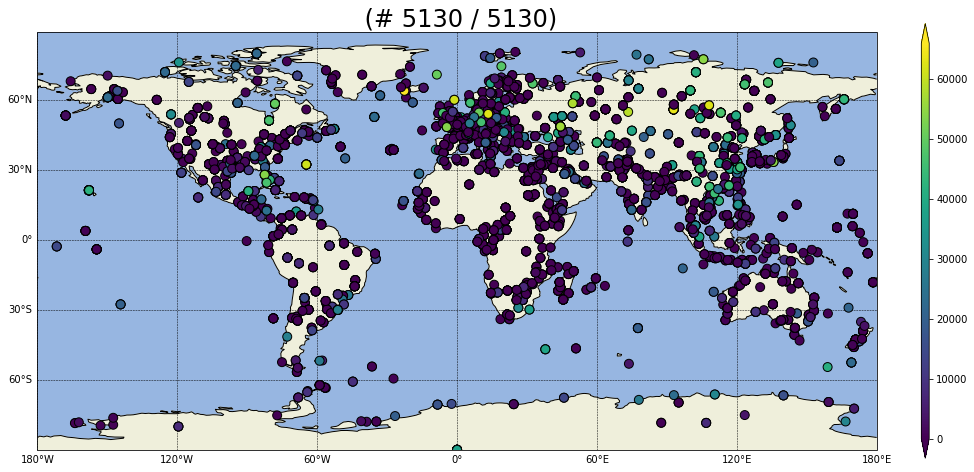

In [69]:
with open(c[2], 'rb') as handle:
    b = pickle.load(handle)
    print(c[2])
rasotools.plot.map.points(lon=b.lon, lat=b.lat, values=b.obs)

/raid60/scratch/uli/igrah_500hpa_2010s.p


<GeoAxesSubplot:title={'center':' (# 606 / 606)'}>

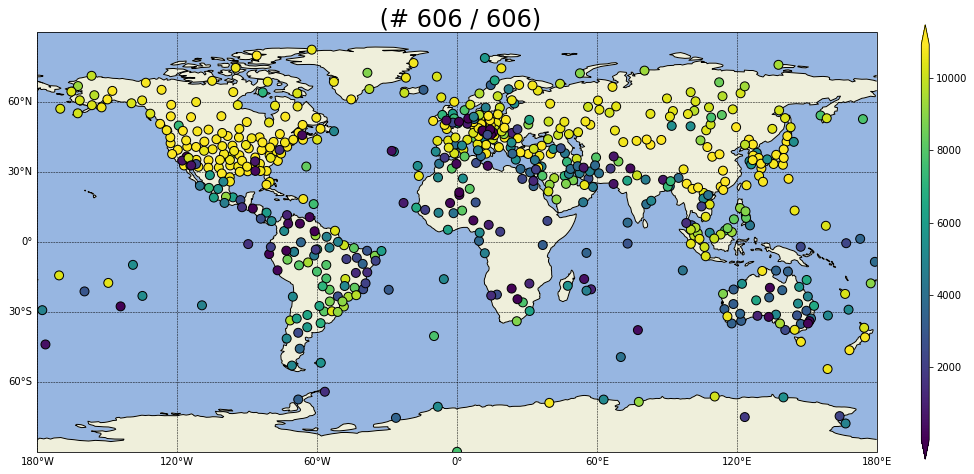

In [70]:
with open(i[2], 'rb') as handle:
    b = pickle.load(handle)
    print(i[2])
rasotools.plot.map.points(lon=b.lon, lat=b.lat, values=b.obs)

/raid60/scratch/uli/cuon_500hpa_2010s.p


<GeoAxesSubplot:title={'center':' (# 5213 / 5213)'}>

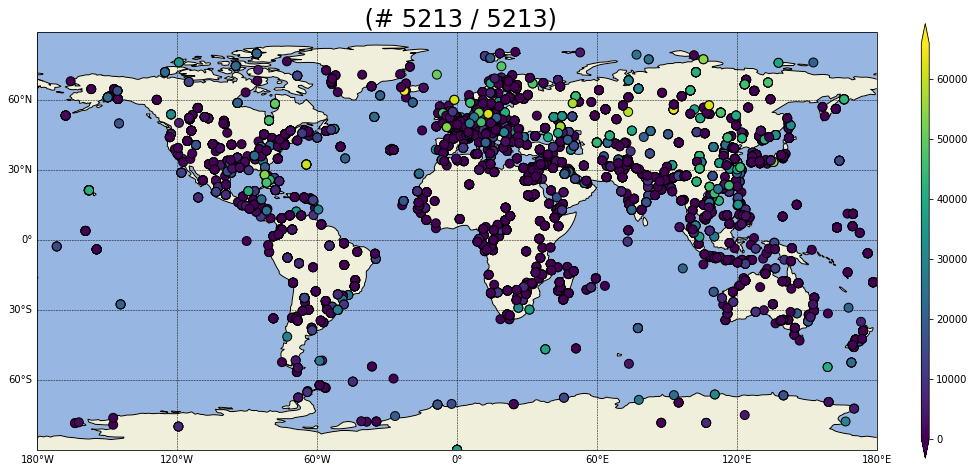

In [71]:
with open(c[3], 'rb') as handle:
    b = pickle.load(handle)
    print(c[3])
rasotools.plot.map.points(lon=b.lon, lat=b.lat, values=b.obs)